In [1]:
import numpy as np
import pandas as pd
import warnings
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_2606_0207 = pd.read_excel('D:\загрузки\Продажи МП 26.06-02.07.xlsx')
data_1007_1607 = pd.read_excel("D:\загрузки\Продажи МП 10.07-16.07.xlsx")
data_0307_0907 = pd.read_excel("D:\загрузки\Продажи МП 03.07-09.07.xlsx")

In [3]:
data = data_2606_0207.merge(data_0307_0907, how='outer')
data = data.merge(data_1007_1607, how='outer')

pd.set_option('display.max_columns', None)
data.head()

D:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(
D:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,№,Номер поставки,Предмет,Код номенклатуры,Бренд,Артикул поставщика,Название,Размер,Баркод,Тип документа,Обоснование для оплаты,Дата заказа покупателем,Дата продажи,Кол-во,Цена розничная,Вайлдберриз реализовал Товар (Пр),"Согласованный продуктовый дисконт, %",Промокод %,Итоговая согласованная скидка,Цена розничная с учетом согласованной скидки,"Размер снижения кВВ из-за рейтинга, %","Размер снижения кВВ из-за акции, %",Скидка постоянного Покупателя (СПП),"Размер кВВ, %","Размер кВВ без НДС, % Базовый","Итоговый кВВ без НДС, %","Вознаграждение с продаж до вычета услуг поверенного, без НДС",Возмещение за выдачу и возврат товаров на ПВЗ,Возмещение издержек по эквайрингу,"Вознаграждение Вайлдберриз (ВВ), без НДС",НДС с Вознаграждения Вайлдберриз,К перечислению Продавцу за реализованный Товар,Количество доставок,Количество возврата,Услуги по доставке товара покупателю,Общая сумма штрафов,Доплаты,"Виды логистики, штрафов и доплат",Стикер МП,Наименование банка-эквайера,Номер офиса,Наименование офиса доставки,ИНН партнера,Партнер,Склад,Страна,Тип коробов,Номер таможенной декларации,ШК,Rid,Srid,Возмещение издержек по перевозке,Организатор перевозки,Код маркировки
0,15450903275,12970129,Лобзики,156447065,Ganta Technology,Товар 15,Товар 15,0,2037710284602,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-16.85,-3.37,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322461,NaN,NaN,20.215,ИП А4-service(870118351264),NaN
1,15450903276,12970129,Шлифовальные машины,156263344,Ganta Technology,Товар 13,Товар 13,0,2037706427624,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-24.08,-4.82,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322431,NaN,NaN,28.891,ИП Хайпхали Нурлан Кударович(342910188312),NaN
2,15450903277,12970129,Шлифовальные машины,156263345,Ganta Technology,Товар 19,Товар 19,0,2037706519190,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-15.72,-3.14,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322416,NaN,NaN,18.858,Индивидуальный предприниматель Ляпко Марина Бо...,NaN
3,15450903278,12970129,Лобзики,156447065,Ganta Technology,Товар 15,Товар 15,0,2037710284602,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-8.20,-1.64,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322426,NaN,NaN,9.834,ИП Панин Виталий Юрьевич(366235075435),NaN
4,15450903279,12970129,Дрели,163704821,Ganta Technology,Товар 16,Товар 16,0,2037932821616,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-10.29,-2.06,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322400,NaN,NaN,12.351,ПВ ЛОГИСТИК(5036175370),NaN


In [4]:
data['Комиссия МП в руб'] = data['Вознаграждение Вайлдберриз (ВВ), без НДС'] + data['НДС с Вознаграждения Вайлдберриз']

In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1655 entries, 0 to 1654
Data columns (total 55 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   №                                                             1655 non-null   int64  
 1   Номер поставки                                                1655 non-null   int64  
 2   Предмет                                                       1655 non-null   object 
 3   Код номенклатуры                                              1655 non-null   int64  
 4   Бренд                                                         1099 non-null   object 
 5   Артикул поставщика                                            1655 non-null   object 
 6   Название                                                      1655 non-null   object 
 7   Размер                                                        1655 no

In [6]:
data.sample(10)

,№,Номер поставки,Предмет,Код номенклатуры,Бренд,Артикул поставщика,Название,Размер,Баркод,Тип документа,Обоснование для оплаты,Дата заказа покупателем,Дата продажи,Кол-во,Цена розничная,Вайлдберриз реализовал Товар (Пр),"Согласованный продуктовый дисконт, %",Промокод %,Итоговая согласованная скидка,Цена розничная с учетом согласованной скидки,"Размер снижения кВВ из-за рейтинга, %","Размер снижения кВВ из-за акции, %",Скидка постоянного Покупателя (СПП),"Размер кВВ, %","Размер кВВ без НДС, % Базовый","Итоговый кВВ без НДС, %","Вознаграждение с продаж до вычета услуг поверенного, без НДС",Возмещение за выдачу и возврат товаров на ПВЗ,Возмещение издержек по эквайрингу,"Вознаграждение Вайлдберриз (ВВ), без НДС",НДС с Вознаграждения Вайлдберриз,К перечислению Продавцу за реализованный Товар,Количество доставок,Количество возврата,Услуги по доставке товара покупателю,Общая сумма штрафов,Доплаты,"Виды логистики, штрафов и доплат",Стикер МП,Наименование банка-эквайера,Номер офиса,Наименование офиса доставки,ИНН партнера,Партнер,Склад,Страна,Тип коробов,Номер таможенной декларации,ШК,Rid,Srid,Возмещение издержек по перевозке,Организатор перевозки,Код маркировки,Комиссия МП в руб
1151,15145405513,0,Пилы строительные,156129700,Ganta Technology,Товар 9,Товар 9,0,2037703890506,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.00,-4.49,-0.90,0.00,0,0,0.00,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12903535934,NaN,NaN,5.385,ИП Топоркова Анастасия Александровна(562361501...,NaN,-5.39
99,15450903374,0,Шуруповерты,156127006,Ganta Technology,Товар 6,Товар 6,0,2037703735944,Продажа,Логистика,2023-07-11,2023-07-16,0,0,0.0,0,0,0.0,0.00,NaN,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,50.00,0.0,0,От клиента при отмене,1.307915e+10,NaN,0.0,Пункт самовывоза (ПВЗ),NaN,NaN,Маркетплейс,Россия,Без коробов,NaN,13079153101,0.0,0725fd3bee8240289c05a162009f4d35,NaN,NaN,NaN,0.00
1427,15145406144,0,Шлифовальные машины,156263345,Ganta Technology,Товар 19,Товар 19,0,2037706519190,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.00,-26.22,-5.24,0.00,0,0,0.00,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12907227122,NaN,NaN,31.461,Индивидуальный предприниматель Мусайева Камала...,NaN,-31.46
153,15450903428,0,Перфораторы,156446893,Ganta Technology,Товар 14,Товар 14,0,2037710279844,Продажа,Логистика,2023-07-04,2023-07-12,0,0,0.0,0,0,0.0,0.00,NaN,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,122.24,0.0,0,К клиенту при продаже,1.291193e+10,NaN,213485.0,NaN,NaN,NaN,Маркетплейс,Россия,Без коробов,NaN,12911928064,0.0,51675992079194144.0.0,NaN,NaN,NaN,0.00
1544,15145406481,12747134,Шуруповерты,156127007,Ganta Technology,Товар 7,Товар 7,0,2037703749781,Продажа,Продажа,2023-06-27,2023-07-03,1,9467,3918.0,52,0,52.0,4544.16,0.0,0.0,0.11,0.1,0.08,-0.04,-143.12,137.13,13.32,-268.49,-53.70,4089.74,0,0,0.00,0.0,0,NaN,NaN,БРС 7707056547,122198.0,NaN,2.466052e+11,ИП Яричина Т. А.,Казань,Россия,Без коробов,NaN,11782041279,0.0,58780901578919726.4.0,NaN,NaN,NaN,-322.19
779,14982255635,12747134,Шуруповерты,156127007,NaN,Товар 7,Товар 7,0,2037703749781,Продажа,Логистика,2023-06-14,2023-06-26,0,0,0.0,0,0,0.0,0.00,NaN,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,60.80,0.0,0,К клиенту при отмене,NaN,NaN,0.0,Пункт самовывоза (ПВЗ),NaN,NaN,Казань,Россия,Моно,NaN,11782041229,0.0,18622171578354556.0.0,NaN,NaN,NaN,0.00
275,15450903550,0,Шуруповерты,156127006,Ganta Technology,Товар 6,Товар 6,0,2037703735944,Продажа,Логистика,2023-07-11,2023-07-16,0,0,0.0,0,0,0.0,0.00,NaN,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,64.00,0.0,0,К клиенту при отмене,1.307915e+10,NaN,0.0,Пункт самовывоза (ПВЗ),NaN,NaN,Маркетплейс,Россия,Без коробов,NaN,13079153103,0.0,e4255c800f9a423cb8961df3aa46c9e5,NaN,NaN,NaN,0.00
1197,15145405606,0,Перфораторы,156446893,Ganta Technology,Товар 14,Товар 14,0,2037710279844,Продажа,Логистика,2023-06-29,2023-07-05,0,0

In [7]:
data['Склад'].value_counts()

Маркетплейс               565
Коледино                  362
Краснодар                 186
Казань                    130
Электросталь               30
Новосибирск                 5
Тула                        4
Санкт-Петербург Шушары      4
Екатеринбург                2
Невинномысск                1
Name: Склад, dtype: int64

In [9]:
data.loc[data['Код номенклатуры'] == 156119742]

,№,Номер поставки,Предмет,Код номенклатуры,Бренд,Артикул поставщика,Название,Размер,Баркод,Тип документа,Обоснование для оплаты,Дата заказа покупателем,Дата продажи,Кол-во,Цена розничная,Вайлдберриз реализовал Товар (Пр),"Согласованный продуктовый дисконт, %",Промокод %,Итоговая согласованная скидка,Цена розничная с учетом согласованной скидки,"Размер снижения кВВ из-за рейтинга, %","Размер снижения кВВ из-за акции, %",Скидка постоянного Покупателя (СПП),"Размер кВВ, %","Размер кВВ без НДС, % Базовый","Итоговый кВВ без НДС, %","Вознаграждение с продаж до вычета услуг поверенного, без НДС",Возмещение за выдачу и возврат товаров на ПВЗ,Возмещение издержек по эквайрингу,"Вознаграждение Вайлдберриз (ВВ), без НДС",НДС с Вознаграждения Вайлдберриз,К перечислению Продавцу за реализованный Товар,Количество доставок,Количество возврата,Услуги по доставке товара покупателю,Общая сумма штрафов,Доплаты,"Виды логистики, штрафов и доплат",Стикер МП,Наименование банка-эквайера,Номер офиса,Наименование офиса доставки,ИНН партнера,Партнер,Склад,Страна,Тип коробов,Номер таможенной декларации,ШК,Rid,Srid,Возмещение издержек по перевозке,Организатор перевозки,Код маркировки,Комиссия МП в руб
884,14982255911,0,Шуруповерты,156119742,NaN,Товар 23,Товар 23,0,2037703297862,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-6.1,-1.22,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11838160018,NaN,NaN,NaN,ИП Невкин(633039245109),NaN,-7.32


Непонятно за что было заплачено ВБ и как товар реализован, а розничная цена 0

In [10]:
df = pd.read_excel("D:\загрузки\Продажи Мой Склад 26.07-10.07.xls")
df.head()

,Unnamed: 0,Код,Артикул,Наименование,Тип документа,Номер,Время,Ед.изм.,Кол-во,Цена,Себест.,Сумма,Сумма себест.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Товар 11,NaN,Товар 11,Отгрузка,9.003420e+12,2023-07-09 19:24:00,шт,1.0,5799.0,3335.52,5799.0,3335.52
2,NaN,Товар 11,NaN,Товар 11,Отгрузка,9.003364e+12,2023-07-09 00:00:00,шт,1.0,5798.0,3335.53,5798.0,3335.53
3,NaN,Товар 11,NaN,Товар 11,Отгрузка,9.003353e+12,2023-07-09 00:00:00,шт,1.0,5700.0,3335.53,5700.0,3335.53
4,NaN,Товар 11,NaN,Товар 11,Отгрузка,9.003395e+12,2023-07-07 13:55:00,шт,1.0,6665.0,3335.52,6665.0,3335.52


In [11]:
test = data.merge(df, how = 'inner', left_on='Название', right_on='Наименование')
test['Комиссия МП в руб'] = abs(test['Комиссия МП в руб'])
test.sample(10)

,№,Номер поставки,Предмет,Код номенклатуры,Бренд,Артикул поставщика,Название,Размер,Баркод,Тип документа_x,Обоснование для оплаты,Дата заказа покупателем,Дата продажи,Кол-во_x,Цена розничная,Вайлдберриз реализовал Товар (Пр),"Согласованный продуктовый дисконт, %",Промокод %,Итоговая согласованная скидка,Цена розничная с учетом согласованной скидки,"Размер снижения кВВ из-за рейтинга, %","Размер снижения кВВ из-за акции, %",Скидка постоянного Покупателя (СПП),"Размер кВВ, %","Размер кВВ без НДС, % Базовый","Итоговый кВВ без НДС, %","Вознаграждение с продаж до вычета услуг поверенного, без НДС",Возмещение за выдачу и возврат товаров на ПВЗ,Возмещение издержек по эквайрингу,"Вознаграждение Вайлдберриз (ВВ), без НДС",НДС с Вознаграждения Вайлдберриз,К перечислению Продавцу за реализованный Товар,Количество доставок,Количество возврата,Услуги по доставке товара покупателю,Общая сумма штрафов,Доплаты,"Виды логистики, штрафов и доплат",Стикер МП,Наименование банка-эквайера,Номер офиса,Наименование офиса доставки,ИНН партнера,Партнер,Склад,Страна,Тип коробов,Номер таможенной декларации,ШК,Rid,Srid,Возмещение издержек по перевозке,Организатор перевозки,Код маркировки,Комиссия МП в руб,Unnamed: 0,Код,Артикул,Наименование,Тип документа_y,Номер,Время,Ед.изм.,Кол-во_y,Цена,Себест.,Сумма,Сумма себест.
45980,15450903359,0,Перфораторы,156446893,Ganta Technology,Товар 14,Товар 14,0,2037710279844,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.00,-12.40,-2.48,0.00,0,0,0.00,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12910284351,NaN,NaN,14.878,ИП Гергелиник Денис Анатольевич(507405054466),NaN,14.88,NaN,Товар 14,NaN,Товар 14,Возврат покупателя,9.109890e+08,2023-07-10 04:53:00,шт,1.0,5617.0,3078.95,5617.0,3078.95
13930,14982255859,12747282,Дрели,163704821,NaN,Товар 16,Товар 16,0,2037932821616,Продажа,Продажа,2023-06-25,2023-06-28,1,7930,2442.0,65,0,65.0,2775.50,0.0,0.0,0.10,0.1,0.08,-0.02,-46.63,62.27,13.43,-109.71,-21.94,2497.95,0,0,0.00,0.0,0,NaN,NaN,Сбербанк Росси 7707083893,150328.0,NaN,3.257072e+09,БК Премиум ООО,Коледино,Россия,Без коробов,NaN,10818341974,0.000000e+00,38376141078837505.0.0,NaN,NaN,NaN,131.65,NaN,Товар 16,NaN,Товар 16,Отгрузка,9.003326e+12,2023-07-01 15:58:00,шт,1.0,2590.0,1436.85,2590.0,1436.85
41617,15145406703,0,Пилы строительные,156129700,Ganta Technology,Товар 9,Товар 9,0,2037703890506,Продажа,Продажа,2023-06-29,2023-07-03,1,10477,4942.0,47,0,47.0,5552.81,0.0,NaN,0.09,0.1,0.08,-0.01,-9.72,148.26,27.18,-155.92,-31.18,4953.66,0,0,0.00,0.0,0,NaN,1.286268e+10,Сбербанк Росси 7707083893,160295.0,NaN,3.424002e+11,Самойлов Павел Дмитриевич,Маркетплейс,Россия,Без коробов,NaN,12862676293,0.000000e+00,66116444078984975.0.0,NaN,NaN,NaN,187.10,NaN,Товар 9,NaN,Товар 9,Отгрузка,9.063730e+08,2023-07-01 20:12:00,шт,1.0,5053.0,2514.48,5053.0,2514.48
9870,15450903444,0,Дрели,163704821,Ganta Technology,Товар 16,Товар 16,0,2037932821616,Продажа,Штрафы,2023-07-13,2023-07-13,0,0,0.0,0,0,0.0,0.00,NaN,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0.00,5.0,0,Платная приемка МП на СЦ,1.308347e+10,NaN,0.0,Пункт самовывоза (ПВЗ),NaN,NaN,Маркетплейс,Россия,Без коробов,NaN,13083470729,0.000000e+00,57865695079595140.0.0,NaN,NaN,NaN,0.00,NaN,Товар 16,NaN,Товар 16,Отгрузка,9.003339e+12,2023-07-02 18:52:00,шт,1.0,2552.0,1436.84,2552.0,1436.84
26980,15145406329,12747134,Шуруповерты,156127007,Ganta Technology,Товар 7,Товар 7,0,2037703749781,Продажа,Продажа,2023-06-28,2023-07-05,1,9467,4089.0,52,0,52.0,4544.16,0.0,0.0,0.08,0.1,0.08,-0.01,-0.62,0.00,22.49,-19.36,-3.87,4089.74,0,0,0.00,0.0,0,NaN,NaN,Сбербанк Росси 7707083893,0.0,Пункт самовывоза (ПВЗ),NaN,NaN,Казань,Россия,Без коробов,NaN,11782041273,6.032689e+11,21457683078936555.0.0,NaN,NaN,NaN,23.23,NaN,Товар 7,NaN,Товар 7,Отгрузка,9.003337e+12,2023-07-02 16:01:00,шт,1.0,3953.0,2200.00,3953.0,2200.00
52732,14982254894,0,Гайковерты,156231959,NaN,Товар 17,Товар 17,0,2037706169562,Продажа,Штрафы,2023-06-30,2023-06-30,0,0,0.0,0,0,0.0,0.00,

In [12]:
test['Дата'] = pd.to_datetime(test['Время']).dt.date
# trend = test.groupby('Дата', as_index=False)
# trend

In [13]:
test['Общие затраты'] = test['Итоговая согласованная скидка'] + test['Скидка постоянного Покупателя (СПП)']
+ test['Вознаграждение с продаж до вычета услуг поверенного, без НДС'] + test['Возмещение за выдачу и возврат товаров на ПВЗ']
+ test['Возмещение издержек по эквайрингу'] + test['Вознаграждение Вайлдберриз (ВВ), без НДС'] + test['НДС с Вознаграждения Вайлдберриз']
+ test['Услуги по доставке товара покупателю'] + test['Общая сумма штрафов'] + test['Доплаты'] + test['Возмещение издержек по перевозке']
+ test['Комиссия МП в руб']
test.head()

,№,Номер поставки,Предмет,Код номенклатуры,Бренд,Артикул поставщика,Название,Размер,Баркод,Тип документа_x,Обоснование для оплаты,Дата заказа покупателем,Дата продажи,Кол-во_x,Цена розничная,Вайлдберриз реализовал Товар (Пр),"Согласованный продуктовый дисконт, %",Промокод %,Итоговая согласованная скидка,Цена розничная с учетом согласованной скидки,"Размер снижения кВВ из-за рейтинга, %","Размер снижения кВВ из-за акции, %",Скидка постоянного Покупателя (СПП),"Размер кВВ, %","Размер кВВ без НДС, % Базовый","Итоговый кВВ без НДС, %","Вознаграждение с продаж до вычета услуг поверенного, без НДС",Возмещение за выдачу и возврат товаров на ПВЗ,Возмещение издержек по эквайрингу,"Вознаграждение Вайлдберриз (ВВ), без НДС",НДС с Вознаграждения Вайлдберриз,К перечислению Продавцу за реализованный Товар,Количество доставок,Количество возврата,Услуги по доставке товара покупателю,Общая сумма штрафов,Доплаты,"Виды логистики, штрафов и доплат",Стикер МП,Наименование банка-эквайера,Номер офиса,Наименование офиса доставки,ИНН партнера,Партнер,Склад,Страна,Тип коробов,Номер таможенной декларации,ШК,Rid,Srid,Возмещение издержек по перевозке,Организатор перевозки,Код маркировки,Комиссия МП в руб,Unnamed: 0,Код,Артикул,Наименование,Тип документа_y,Номер,Время,Ед.изм.,Кол-во_y,Цена,Себест.,Сумма,Сумма себест.,Дата,Общие затраты
0,15450903275,12970129,Лобзики,156447065,Ganta Technology,Товар 15,Товар 15,0,2037710284602,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-16.85,-3.37,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322461,NaN,NaN,20.215,ИП А4-service(870118351264),NaN,20.22,NaN,Товар 15,NaN,Товар 15,Отгрузка,9.003412e+12,2023-07-09 06:26:00,шт,1.0,3949.0,1884.08,3949.0,1884.08,2023-07-09,NaN
1,15450903275,12970129,Лобзики,156447065,Ganta Technology,Товар 15,Товар 15,0,2037710284602,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-16.85,-3.37,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322461,NaN,NaN,20.215,ИП А4-service(870118351264),NaN,20.22,NaN,Товар 15,NaN,Товар 15,Отгрузка,9.003410e+12,2023-07-08 22:29:00,шт,1.0,3949.0,1884.08,3949.0,1884.08,2023-07-08,NaN
2,15450903275,12970129,Лобзики,156447065,Ganta Technology,Товар 15,Товар 15,0,2037710284602,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-16.85,-3.37,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322461,NaN,NaN,20.215,ИП А4-service(870118351264),NaN,20.22,NaN,Товар 15,NaN,Товар 15,Отгрузка,9.003407e+12,2023-07-08 16:34:00,шт,1.0,3949.0,1884.07,3949.0,1884.07,2023-07-08,NaN
3,15450903275,12970129,Лобзики,156447065,Ganta Technology,Товар 15,Товар 15,0,2037710284602,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-16.85,-3.37,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322461,NaN,NaN,20.215,ИП А4-service(870118351264),NaN,20.22,NaN,Товар 15,NaN,Товар 15,Отгрузка,9.003404e+12,2023-07-08 12:34:00,шт,1.0,3949.0,1884.08,3949.0,1884.08,2023-07-08,NaN
4,15450903275,12970129,Лобзики,156447065,Ganta Technology,Товар 15,Товар 15,0,2037710284602,Продажа,Возмещение издержек по перевозке,NaN,NaN,1,0,0.0,0,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-16.85,-3.37,0.0,0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10419322461,NaN,NaN,20.215,ИП А4-service(870118351264),NaN,20.22,NaN,Товар 15,NaN,Товар 15,Отгрузка,5.000119e+12,2023-07-08 11:20:00,шт,1.0,4682.0,1898.69,4682.0,1898.69,2023-07-08,NaN


In [24]:
a = (
    test.groupby(['Код номенклатуры', 'Наименование'], as_index=False)
    .agg({'Цена':'sum', 'Себест.':'sum', 'Кол-во_x':'sum', 'Комиссия МП в руб':'sum', 
          'Услуги по доставке товара покупателю':'sum', 'Общая сумма штрафов':'sum',
         'Общие затраты':'sum'})
)
neworder = ['Код номенклатуры', 'Наименование', 'Кол-во_x', 'Цена', 'Себест.',
            'Комиссия МП в руб', 'Услуги по доставке товара покупателю', 'Общая сумма штрафов', 'Общие затраты']
a=a.reindex(columns=neworder)
a['Валовая прибыль'] = a['Цена'] - a['Себест.']
a['Маржинальность, %'] = round((a['Цена'] - a['Себест.'] - a['Общие затраты']) / a['Цена'] * 100, 2)
a['ROI, %'] = round((a['Цена'] - a['Себест.'] - a['Общие затраты']) / (a['Себест.'] + a['Общие затраты']) * 100, 2)
a

,Код номенклатуры,Наименование,Кол-во_x,Цена,Себест.,Комиссия МП в руб,Услуги по доставке товара покупателю,Общая сумма штрафов,Общие затраты,Валовая прибыль,"Маржинальность, %","ROI, %"
0,153669814,Товар 1,128,594800.0,320000.00,11148.64,6681.60,0.0,3695.20,274800.00,45.58,83.75
1,156119743,Товар 2,615,4821530.0,2415000.00,83075.25,36648.00,0.0,16006.35,2406530.00,49.58,98.33
2,156119744,Товар 3,162,1248052.0,678600.00,18422.55,6681.60,0.0,3688.11,569452.00,45.33,82.92
3,156119745,Товар 4,1472,14737041.0,7840540.62,179690.88,76748.80,7680.0,45012.80,6896500.38,46.49,86.89
4,156127006,Товар 6,255,3054864.0,1705000.00,17489.75,23630.00,61170.0,15662.20,1349864.00,43.67,77.54
5,156127007,Товар 7,3510,24943488.0,13502097.68,446334.75,145350.00,0.0,100048.50,11441390.32,45.47,83.38
6,156127008,Товар 8,20,603900.0,341789.40,8259.40,3800.00,550.0,676.80,262110.60,43.29,76.34
7,156127009,Товар 22,28,569280.0,332526.40,4453.88,1354.88,23781.2,805.52,236753.60,41.45,70.78
8,156129700,Товар 9,6318,60643737.0,31335766.77,516757.86,398999.52,262140.3,167165.10,29307970.23,48.05,92.50
9,156213611,Товар 10,117,972279.0,529597.74,17237.97,10096.56,0.0,2615.85,442681.26,45.26,82.69


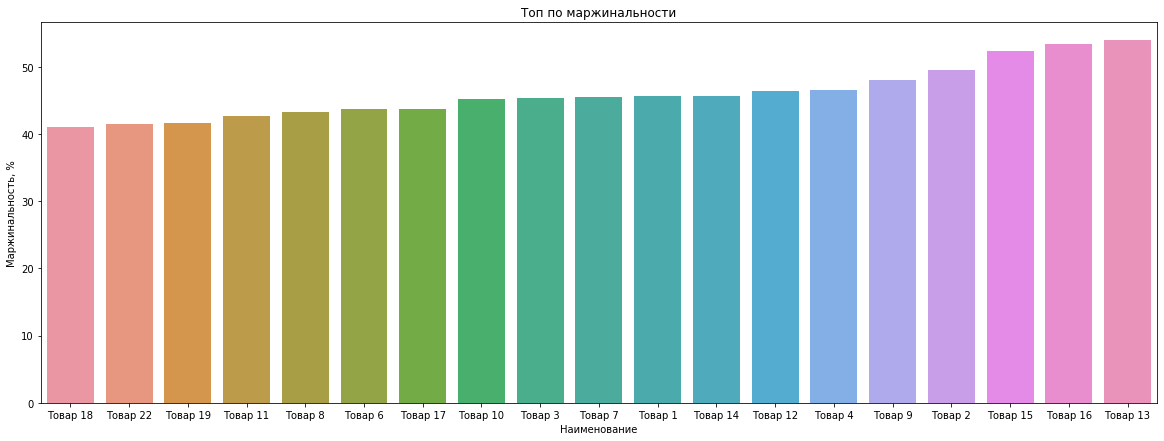

In [43]:
plt.figure(figsize=(20,7))
sns.barplot(data=a.sort_values(by='Маржинальность, %'), x="Наименование", y="Маржинальность, %")
plt.title('Топ по маржинальности');

Топ по маржинальности занимают товар 15, 16 и 13, отстают товар 18, 22 и 19

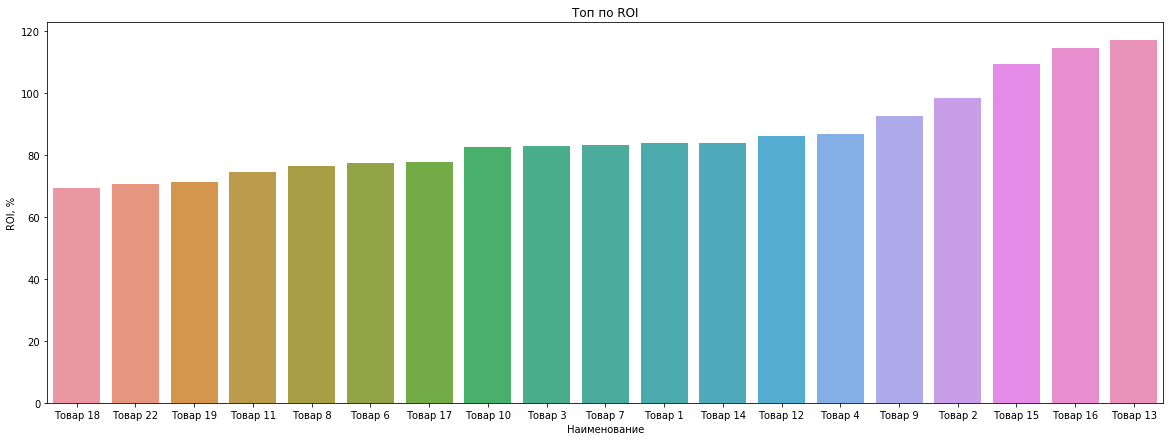

In [44]:
plt.figure(figsize=(20,7))
sns.barplot(data=a.sort_values(by='ROI, %'), x="Наименование", y="ROI, %")
plt.title('Топ по ROI');

Топ по ROI занимают те же товары, которые в топе по маржинальности, аутсайдеры те же товары, которые имеют наименьшую маржинальность

In [27]:
test['Дата'] = pd.to_datetime(test['Дата'])

In [28]:
b = test.loc[test['Наименование']  == 'Товар 13']

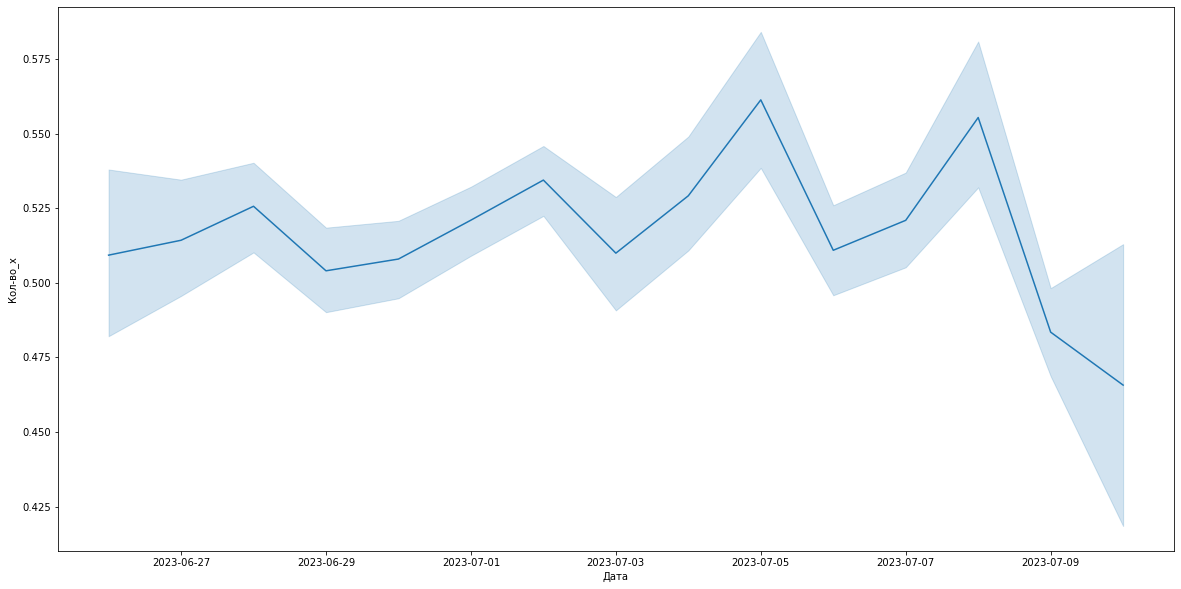

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Дата', y='Кол-во_x', data=test);

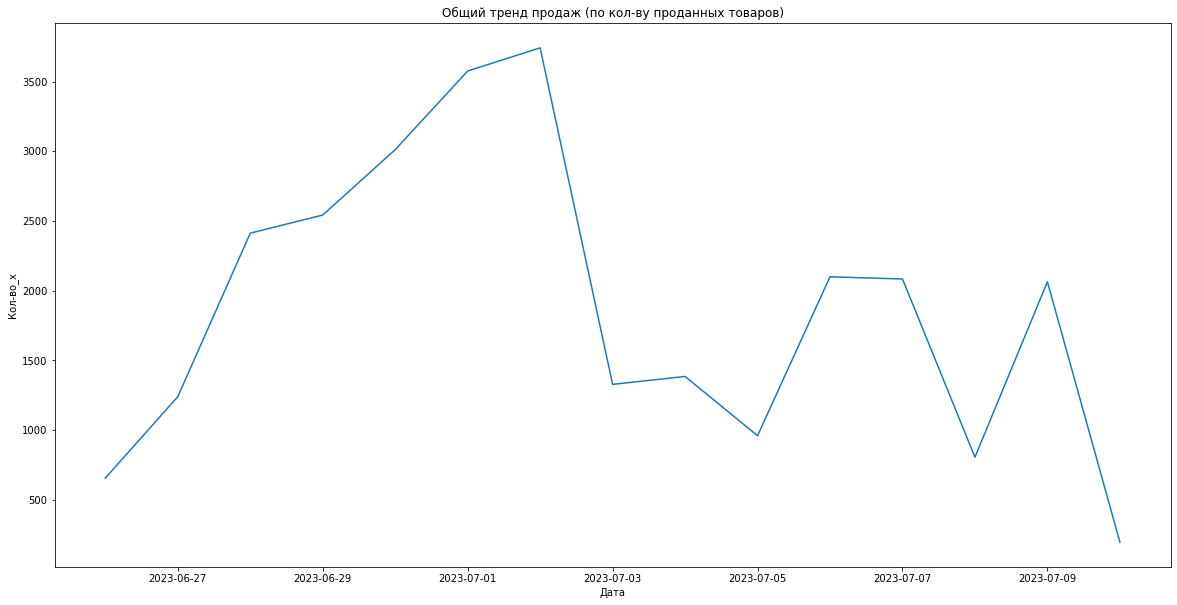

In [41]:
sales_count = test.groupby('Дата', as_index=False).agg({'Кол-во_x':'sum'})
plt.figure(figsize=(20,10))
sns.lineplot(x='Дата', y='Кол-во_x', data=sales_count)
plt.title('Общий тренд продаж (по кол-ву проданных товаров)');

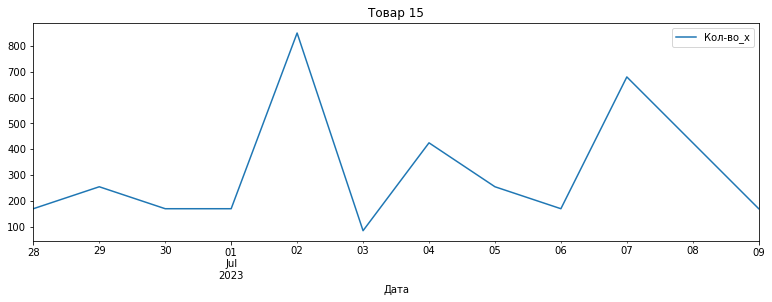

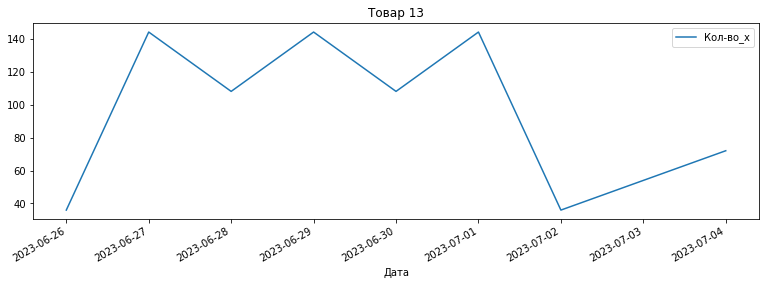

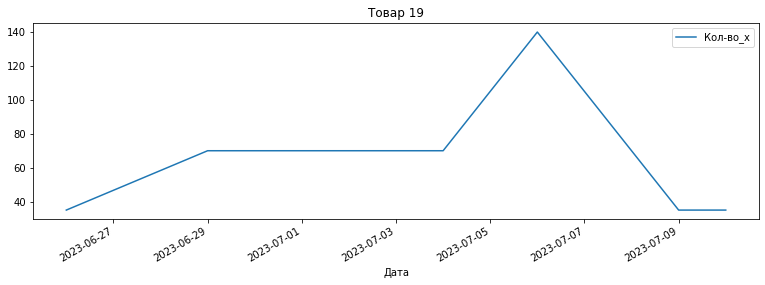

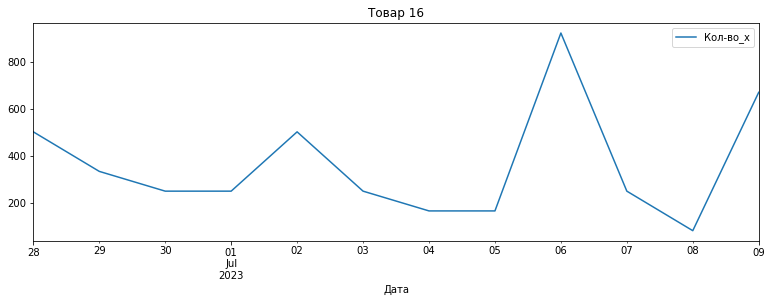

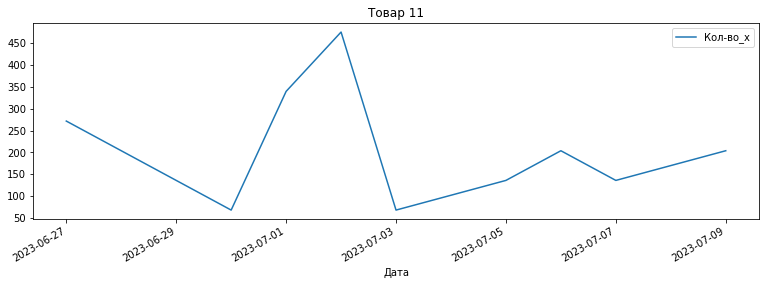

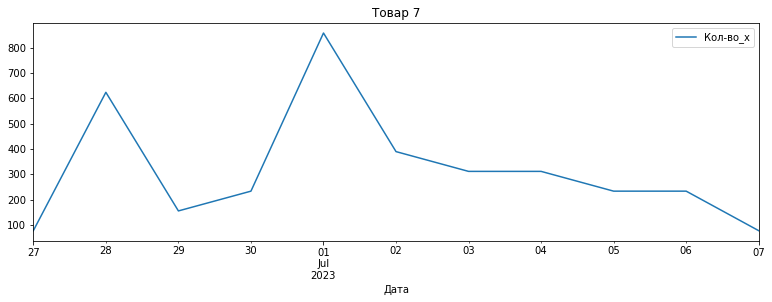

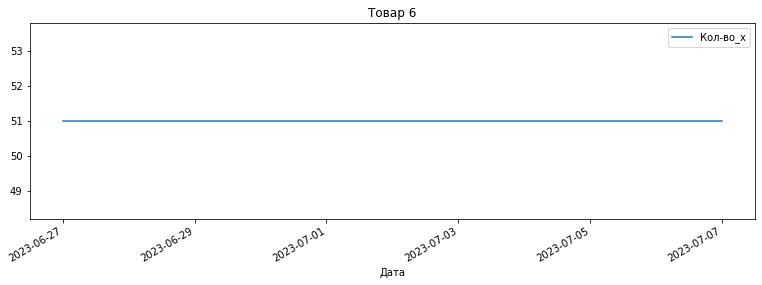

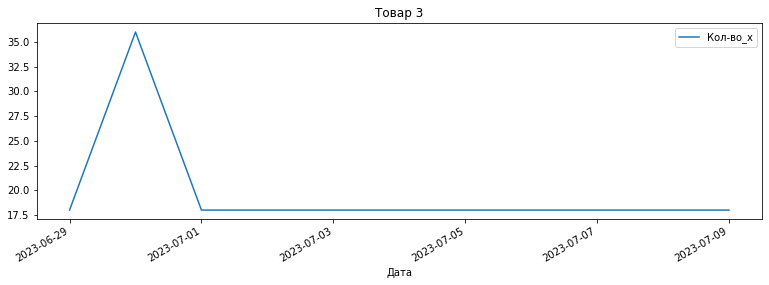

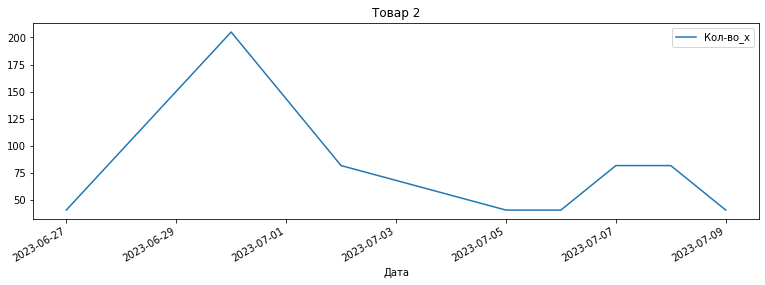

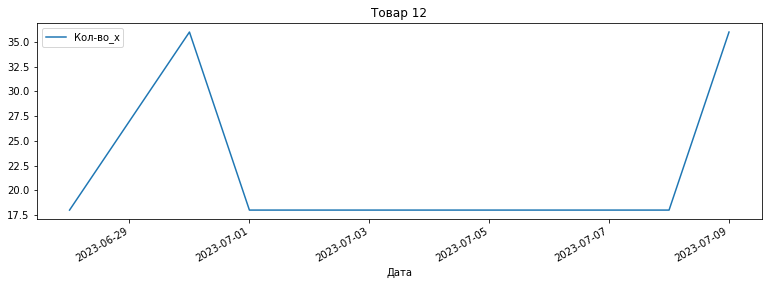

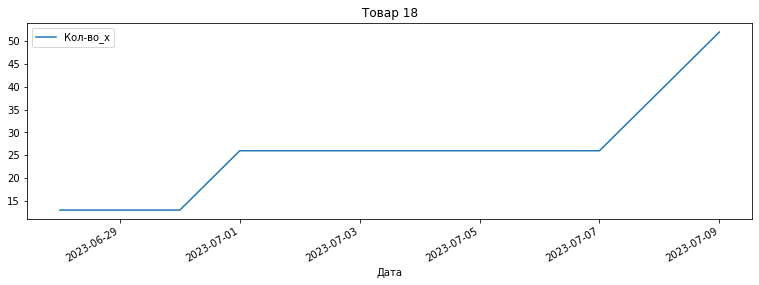

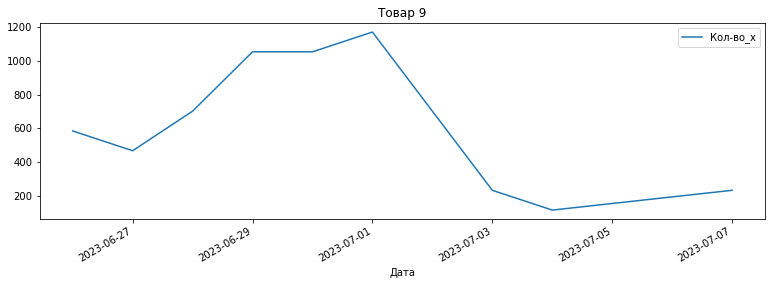

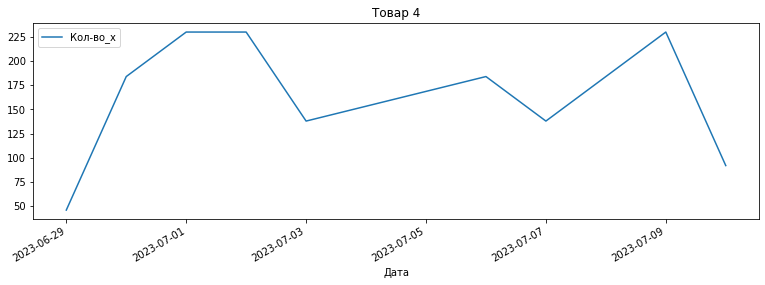

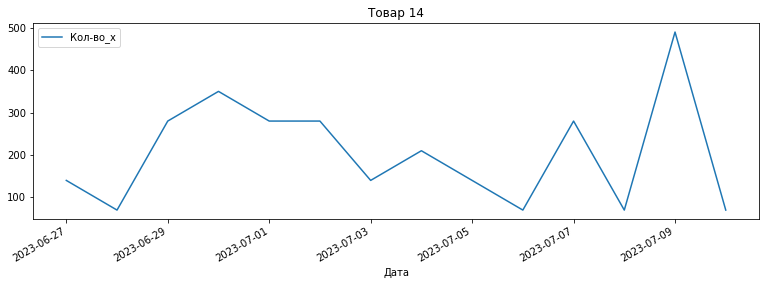

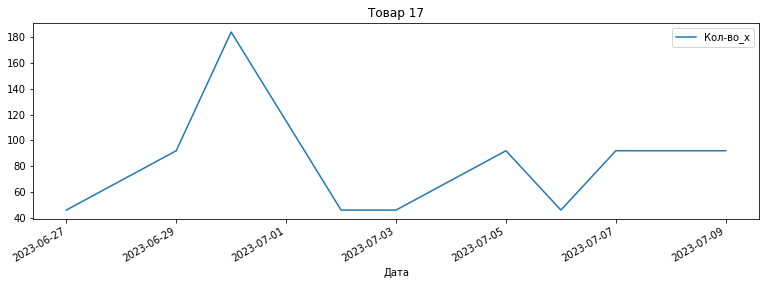

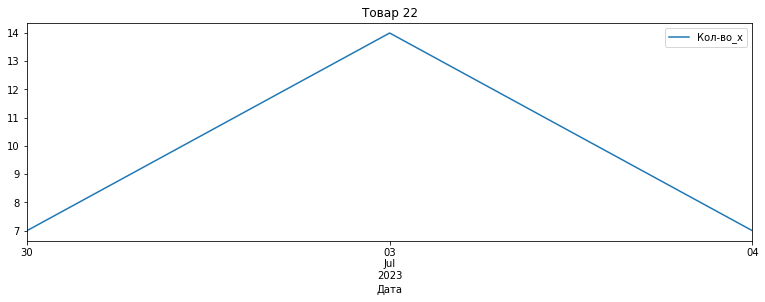

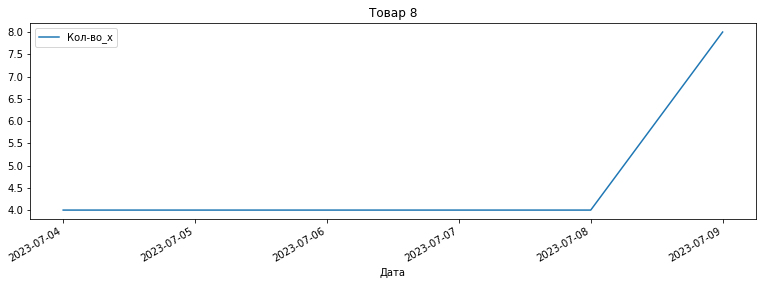

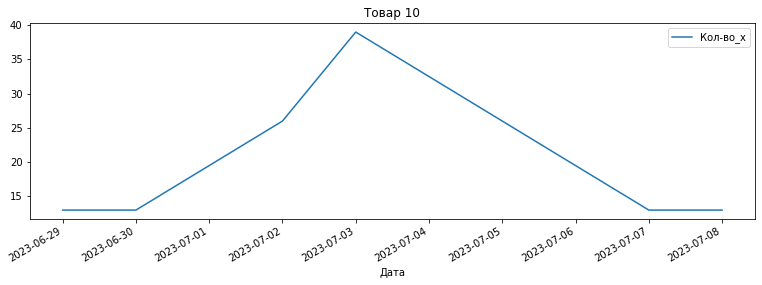

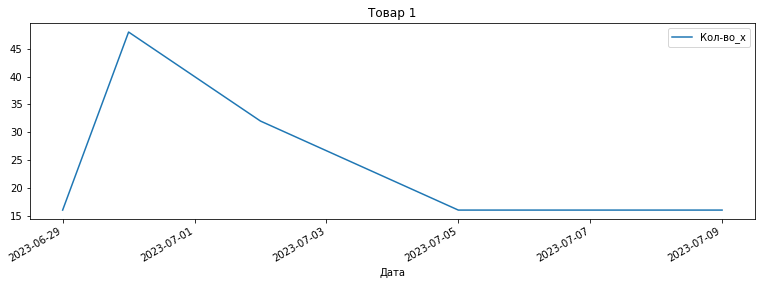

In [31]:
unique_list = test['Код'].unique()

for i in unique_list:
#     table = test.loc[test['Код'] == i]
#     v = table.groupby('Дата', as_index=False).agg({'Кол-во_x':'sum'})
#     sns.lineplot(x='Дата', y='Кол-во_x', data=v);
#     plt.title(i)
    test[test['Код'] == i].pivot_table(index='Дата', values='Кол-во_x', aggfunc='sum').plot(
    kind='line', figsize=(13,4))
    plt.title(i)

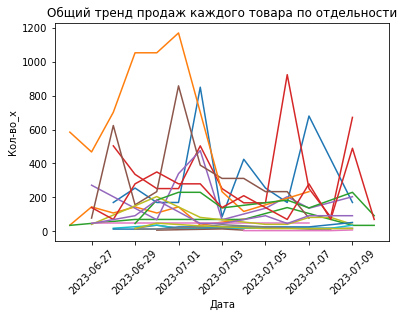

In [42]:
for i in unique_list:
    table = test.loc[test['Код'] == i]
    v = table.groupby('Дата', as_index=False).agg({'Кол-во_x':'sum'})
    sns.lineplot(x='Дата', y='Кол-во_x', data=v)
    plt.xticks (rotation= 45)
    plt.title('Общий тренд продаж каждого товара по отдельности');
    


## Общий вывод

Склеил все 4 файла, свёл все в единую таблицу по образцу задания.

1. Код номенклатуры, как я понял, это и есть артикул в данных, которые мне дали
2. Наименование добавил, чтобы можно было более понятно, что за товар
3. Посчитал общее кол-во на основе всех данных
4. Просуммировал все продажи
5. Просуммировал себестоимость
6. Просуммировал комсу МП
7. Из всех данных по логистике обнаружил только колонку услуги по доставке товара покупателю, на основе чего и сложил данные
8. Сложил все штрафы
9. Общие затраты посчитал следующим образом: сложил столбцы Итоговая согласованная скидка + Скидка постоянного Покупателя (СПП) Вознаграждение с продаж до вычета услуг поверенного, без НДС + Возмещение за выдачу и возврат товаров на ПВЗ
+ Возмещение издержек по эквайрингу + Вознаграждение Вайлдберриз (ВВ), без НДС + НДС с Вознаграждения Вайлдберриз
+ Услуги по доставке товара покупателю + Общая сумма штрафов + Доплаты + Возмещение издержек по перевозке
+ Комиссия МП в руб"

Непонятно за что было заплачено ВБ и как товар реализован, а розничная цена 0 за товар по коду нуменклатуры 14982255911, посмотрел на ВБ, он не в наличии, но как осуществилась продажа, непонятно

Валовую прибыль нашел по формуле:

Цена - себестоимость

Маржинальность посчитал по формуле	               

(Сумма продаж - общие затраты) / сумма продаж	   

ROI посчитал по формуле

(Сумма продаж - общие затраты) / общие затраты

Ярко выраженных трендов по количеству продаж нет, за исключением товара 18, по количеству он в восходящем тренде, все остальные товары находятся в различных диапазонах

Топ по маржинальности занимают товар 15, 16 и 13, отстают товар 18, 22 и 19

Топ по ROI занимают те же товары, которые в топе по маржинальности, аутсайдеры те же товары, которые имеют наименьшую маржинальность

Прогнозы делать на основе машинного обучения не целесообразно, так как очень маленькое количество данных, высокая вероятность того, что прогноз будет просто случайным и никакой пользы не принесет